In [ ]:
# Import Pandas module for data manipulation
import pandas as pd

# Import NumPy module for math operations
import numpy as np

# Import the randint function
from random import random
from random import randint

# Import Seaborn module for data visualization
import seaborn as sns

# Import Matplotlib module to create graphs
import matplotlib.pyplot as plt


# import machine learning model
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.pipeline import Pipeline

# Import the Imbalanced-Learn module to resolve class imbalance
from imblearn.over_sampling import SMOTE

# Import the Pickle module to store and retrieve Python objects
import pickle

# Import StandardScaler module for feature scaling
from sklearn.preprocessing import StandardScaler

# Import GridSearchCV and RandomizedSearchCV modules for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score


# For split data train and split division
from sklearn.model_selection import train_test_split

# Import the ConfusionMatrixDisplay module to display the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, recall_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay, precision_score, f1_score, precision_recall_curve, auc

# Import the AdaBoostClassifier module for boosting
from sklearn.ensemble import AdaBoostClassifier

# to calculate the VIF value for multicollinearity checks
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import module to ignore warnings
import warnings
# Turn off alerts
warnings.filterwarnings('ignore') # Turn off warnings


In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df.head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
df.isnull().sum()


,0
Bankrupt?,0
ROA(C) before interest and depreciation before interest,0
ROA(A) before interest and % after tax,0
ROA(B) before interest and depreciation after tax,0
Operating Gross Margin,0
...,...
Liability to Equity,0
Degree of Financial Leverage (DFL),0
Interest Coverage Ratio (Interest expense to EBIT),0
Net Income Flag,0


In [ ]:
# View the dataframe shape (number of rows and columns)

nRow, nCol = df. shape
print(f'\nThe data content consists of {nRow} rows and {nCol} columns')


The data content consists of 6819 rows and 96 columns


In [ ]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [ ]:
# Remove whitespace from all columns

df.columns = df.columns.str.strip()

In [ ]:
# going to change the bankrupt? column to Bankrupt
df = df.rename(columns={'Bankrupt?': 'Bankrupt'})

In [ ]:

# select columns that are not numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number'])

# Check if there are columns that are not numeric columns
if not non_numeric_columns.empty:
     print("Non-numeric columns:")
     print(non_numeric_columns.columns)
else:
     print("All columns are numerical.")

All columns are numerical.


In [ ]:
# check duplicate rows in the dataset

print('{} of data is duplicated rows'.format(
     str(round(df.duplicated().sum() / df.size * 100.5))+'%'))
print('')
print('number of duplicate rows:', df.duplicated().sum())

0% of data is duplicated rows

number of duplicate rows: 0


In [ ]:
# checking missing values
missing_values_per_column = df.isna().sum()
missing_columns = missing_values_per_column[missing_values_per_column > 0]

if missing_columns.empty:
    print("No missing value")
else:
    print("Columns with missing values: ")
    print(missing_columns)

No missing value


"data.info" that dataset has mostly "float64" data. Categorical data is different as binary number is 1 and 0, so it is sorted as type"int64". so we will seperate numerical and categorical data to analyze the data set.

In [ ]:
# if the dtype is INT64 then it is considered a categorical number
numeric_columns = df.dtypes[df.dtypes != 'int64'].index
categorical_columns = df.dtypes[df.dtypes == 'int64'].index

df[categorical_columns].columns.tolist()

['Bankrupt', 'Liability-Assets Flag', 'Net Income Flag']

As we can see we have only 3 categorical data columns. so we will go ahead with these 3 first.

In [ ]:
#Target class distribution(bankrupt)

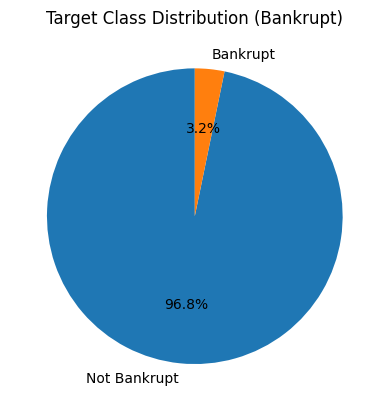

Bankrupt
0    6599
1     220
Name: count, dtype: int64


In [ ]:
df['Bankrupt'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['Not Bankrupt', 'Bankrupt'])
plt.title('Target Class Distribution (Bankrupt)')
plt.ylabel('') # Remove the 'Amount' label as it is not relevant for pie charts
plt.show()

# Displays value counts
print(df['Bankrupt'].value_counts())


The data set looks very unbalanced. Therefore, it is necessary to consider balancing the dataset via the SMOTE technique.

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to overcome the problem of dataset imbalance. This is a technique commonly used to improve minority classes in classification problems.

In [ ]:
#Distribution of the "Liability-Assests Flag"

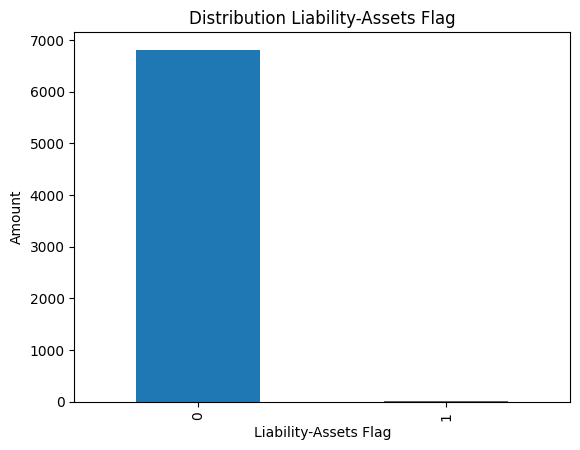

In [ ]:
df['Liability-Assets Flag'].value_counts().plot(kind='bar')
plt.title('Distribution Liability-Assets Flag')
plt.xlabel('Liability-Assets Flag')
plt.ylabel('Amount')
plt.show()

df['Liability-Assets Flag'].value_counts()
colors = ["Greys" , "Reds" , "Greens" , "Blues" , "Oranges" , "Purples" , "BuGn" , "BuPu" , "GnBu" , "OrRd" , "PuBu" , "PuRd" , "RdPu" , "YlGn" , "PuBuGn" , "YlGnBu"]

The "Liability-Assets Flag" shows the status of an organization, where if total liabilities exceed total assets, the marked value is 1, otherwise the value is 0. Often, an organization/company's assets are greater than its liabilities.

Liability-Assets Flag  Bankrupt
0                      0           6597
                       1            214
1                      1              6
                       0              2
Name: count, dtype: int64


<Axes: xlabel='Liability-Assets Flag', ylabel='count'>

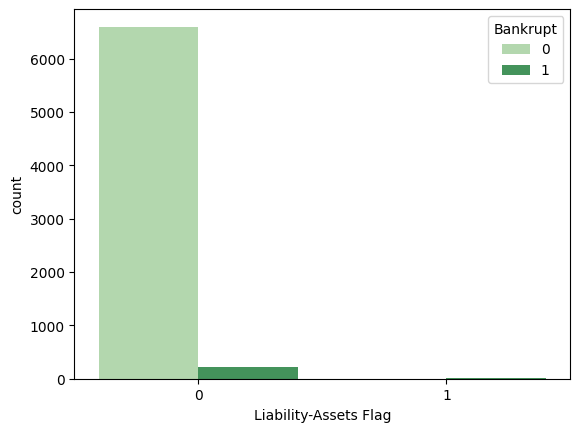

In [ ]:
value = randint(0, len(colors)-1)
print(df[['Liability-Assets Flag','Bankrupt']].value_counts())
sns.countplot(x = 'Liability-Assets Flag',hue = 'Bankrupt',data = df,palette = colors[value])

A small percentage of organizations go bankrupt, even though they have more assets than liabilities

In [ ]:
#Distribution of the "net income flag"

Net Income Flag  Bankrupt
1                0           6599
                 1            220
Name: count, dtype: int64


<Axes: xlabel='Net Income Flag', ylabel='count'>

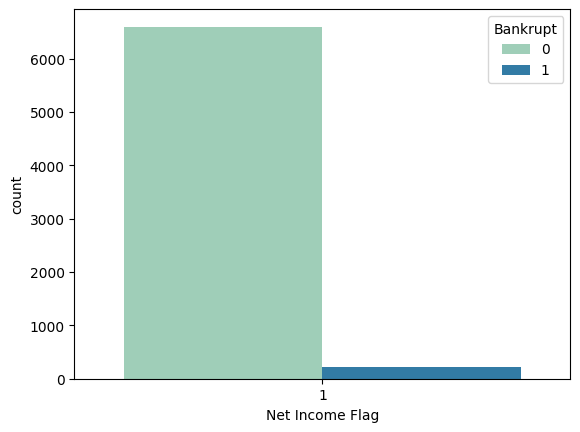

In [ ]:
value = randint(0, len(colors)-1)

print(df[['Net Income Flag','Bankrupt']].value_counts())
sns.countplot(x = 'Net Income Flag',hue = 'Bankrupt',data = df,palette = colors[value])

Net Income Flag' shows the income status of the organization in the last two years, where if the net income for the last two years is negative, the flagged value is 1, otherwise the value is 0. In the dataset it shows everything is loss for the last two years.

Many organizations that experienced losses over the past two years have stabilized their businesses and thus avoided bankruptcy

In [ ]:
#lets find out the average profit margin based on Bankruptcy. The data based on the "bankrupt" lable and calculate the average for the profit margin feature. this will and can provid insights into how profit margins relate to the likelihood of bankruptcy.

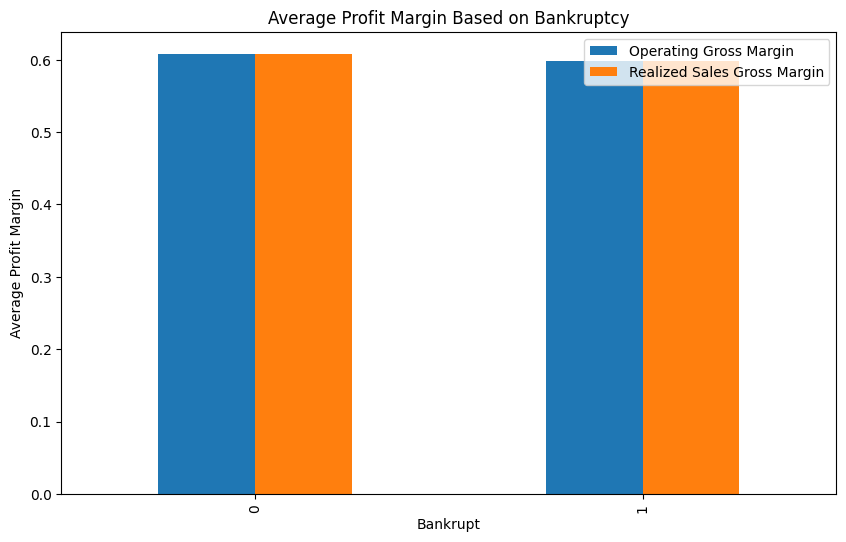

,Operating Gross Margin,Realized Sales Gross Margin
Bankrupt,,
0,0.608257,0.608237
1,0.598670,0.598717


In [ ]:
grouped_data_profit = df.groupby('Bankrupt')[['Operating Gross Margin', 'Realized Sales Gross Margin']].mean()
grouped_data_profit.plot(kind='bar', figsize=(10, 6))
plt.title('Average Profit Margin Based on Bankruptcy')
plt.ylabel('Average Profit Margin')
plt.show()
grouped_data_profit

In [ ]:
#correlation between liabilities and equity,
#Use of a scatter plot to see the relationship between "liability to equity"
#and "Equity to liabilty"

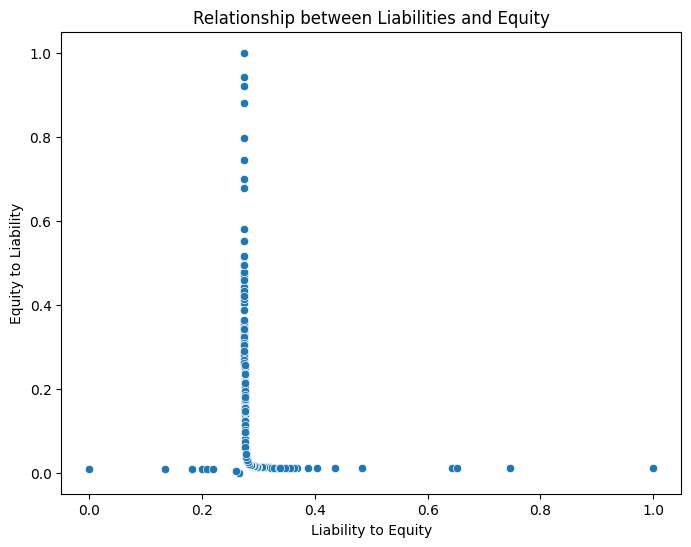

Correlation between 'Liability to Equity' and 'Equity to Liability': -0.15965407932497583


In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Liability to Equity', y='Equity to Liability')
plt.title('Relationship between Liabilities and Equity')
plt.xlabel('Liability to Equity')
plt.ylabel('Equity to Liability')
plt.show()

# Calculates the correlation between 'Liability to Equity' and 'Equity to Liability'
correlation = df['Liability to Equity'].corr(df['Equity to Liability'])
# Prints the correlation value
print("Correlation between 'Liability to Equity' and 'Equity to Liability':", correlation)


In a business context, this could mean that there is little relationship between a company's liabilities and its equity, and changes in one of the two do not significantly affect the other. In other words, the company's obligations (liabilities) do not seem to be very related to the company's equity.

In [ ]:
# Analysis of the top 5 attributes that are positively and negavtively correlated with 'bankrupt'

In [ ]:
positive_corr = df[numeric_columns].corrwith(df["Bankrupt"]).sort_values(ascending=False)[:5].index.tolist()
negative_corr = df[numeric_columns].corrwith(df["Bankrupt"]).sort_values()[:5].index.tolist()

positive_corr = df[positive_corr + ["Bankrupt"]].copy()
negative_corr = df[negative_corr + ["Bankrupt"]].copy()

print('POSITIVE CORR COLUMNS (TOP 5):')
print(positive_corr.columns)
print('\nNEGATIVE CORR COLUMNS (TOP 5):')
print(negative_corr.columns)

POSITIVE CORR COLUMNS (TOP 5):
Index(['Debt ratio %', 'Current Liability to Assets', 'Borrowing dependency',
       'Current Liability to Current Assets', 'Liability to Equity',
       'Bankrupt'],
      dtype='object')

NEGATIVE CORR COLUMNS (TOP 5):
Index(['Net Income to Total Assets', 'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'ROA(C) before interest and depreciation before interest',
       'Net worth/Assets', 'Bankrupt'],
      dtype='object')


In [ ]:
def corrbargraph(x_value, y_value):

    plt.figure(figsize=(15,8))
    value = randint(0, len(colors)-1)

    for i in range(1,6):
        plt.subplot(2,3,i)
        sns.barplot(x = x_value, y = y_value[i-1],data = df,palette = colors[value])

    plt.tight_layout(pad=0.5)

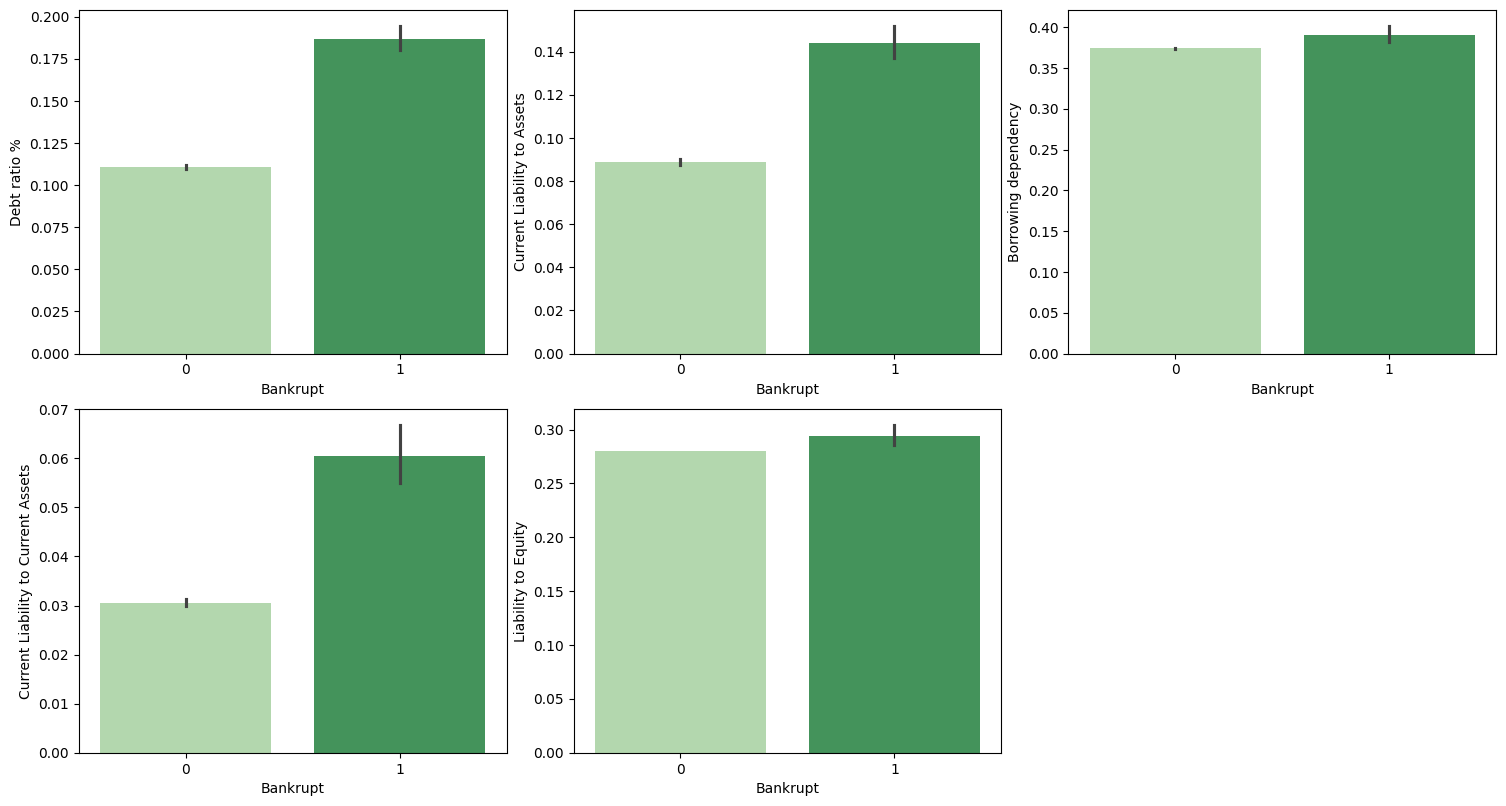

In [ ]:
x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

We see that three attributes – “Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets” are generally high in bankrupt organizations.

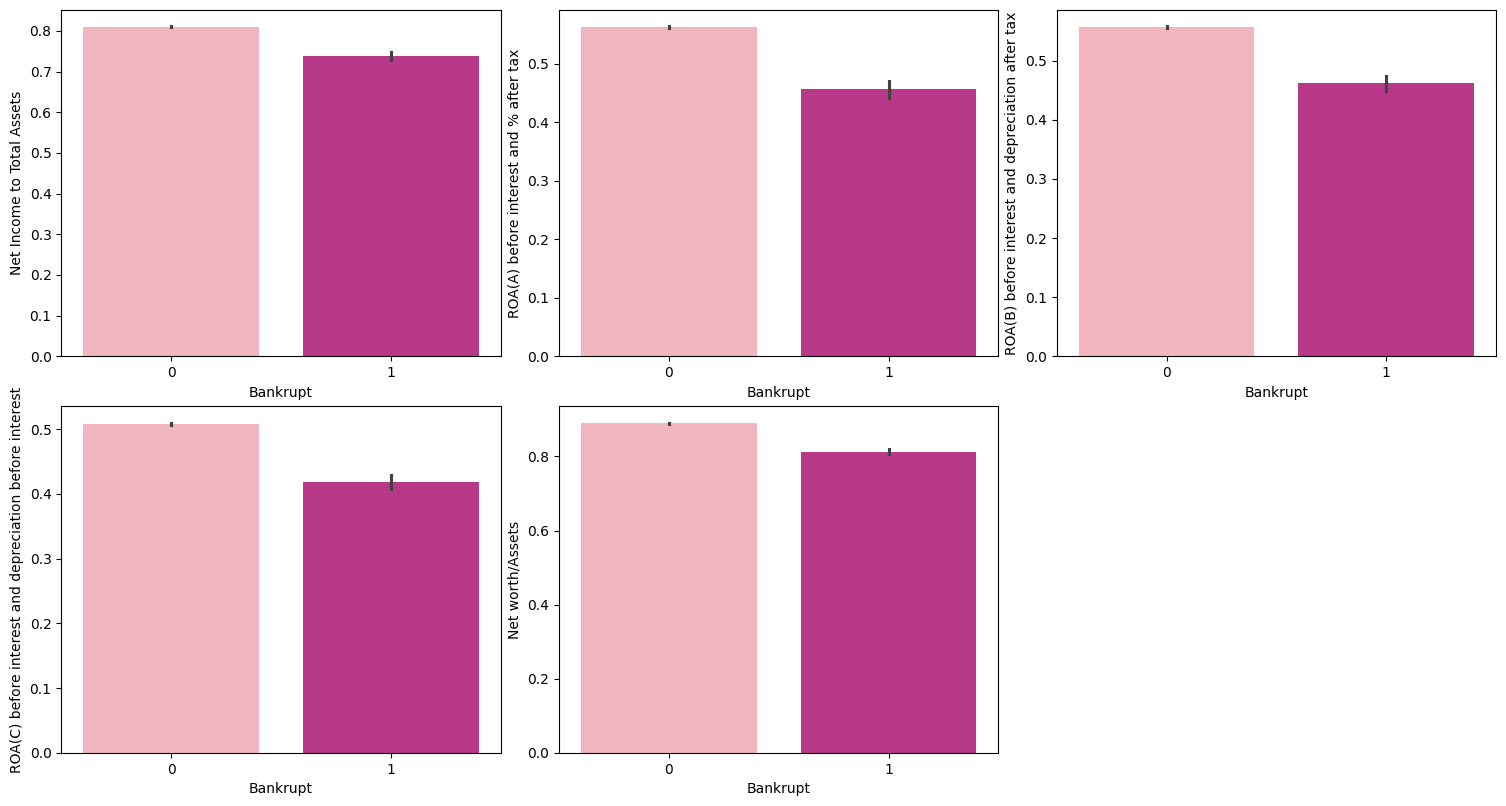

In [ ]:
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

These attributes show us that the more assets and revenues a company has, the less likely the organization is to go bankrupt.



In [ ]:
#lets find the relation between the 5 positive and negavtive correlation attribiutes to each other

<Axes: >

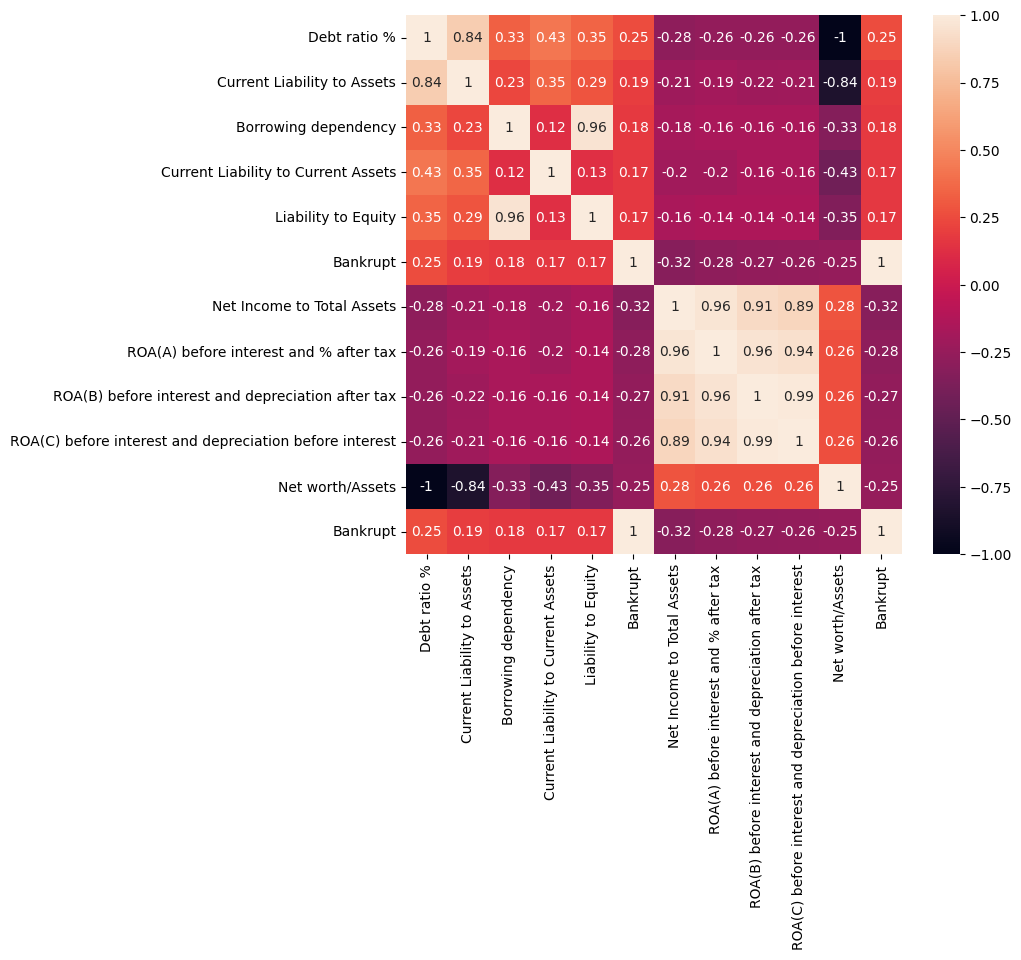

In [ ]:
# A total correlation of the top 10 attributes are given above with Bankrupt

relation = positive_corr.columns.tolist() + negative_corr.columns.tolist()
plt.figure(figsize=(8,7))
sns.heatmap(df[relation].corr(),annot=True)

In [ ]:
data_feature = df.copy()

In [ ]:
# Finding the top 20 of each positive correlation and negative correlation to find 40 columns that will be used as features

positive_corr_top20 = data_feature.corrwith(data_feature["Bankrupt"]).sort_values(ascending=False)[:20]
negative_corr_top20 = data_feature.corrwith(data_feature["Bankrupt"]).sort_values()[:20]

positive_corr_top20_df = positive_corr_top20.index.tolist()
negative_corr_top20_df = negative_corr_top20.index.tolist()

print('POSITIVE CORR COLUMNS (TOP 20):')
print(positive_corr_top20_df)
print(positive_corr_top20)

POSITIVE CORR COLUMNS (TOP 20):
['Bankrupt', 'Debt ratio %', 'Current Liability to Assets', 'Borrowing dependency', 'Current Liability to Current Assets', 'Liability to Equity', 'Current Liabilities/Equity', 'Current Liability to Equity', 'Liability-Assets Flag', 'Total expense/Assets', 'Equity to Long-term Liability', 'Cash/Current Liability', 'Inventory and accounts receivable/Net value', 'Fixed Assets Turnover Frequency', 'Contingent liabilities/Net worth', 'Fixed Assets to Assets', 'Net Value Growth Rate', 'Revenue per person', 'Total assets to GNP price', 'Quick Asset Turnover Rate']
Bankrupt                                       1.000000
Debt ratio %                                   0.250161
Current Liability to Assets                    0.194494
Borrowing dependency                           0.176543
Current Liability to Current Assets            0.171306
Liability to Equity                            0.166812
Current Liabilities/Equity                     0.153828
Current Liab

In [ ]:
print('\nNEGATIVE CORR COLUMNS (TOP 20):')
print(negative_corr_top20_df)
print(negative_corr_top20)


NEGATIVE CORR COLUMNS (TOP 20):
['Net Income to Total Assets', 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'ROA(C) before interest and depreciation before interest', 'Net worth/Assets', 'Persistent EPS in the Last Four Seasons', 'Retained Earnings to Total Assets', 'Net profit before tax/Paid-in capital', 'Per Share Net profit before tax (Yuan ¥)', 'Working Capital to Total Assets', "Net Income to Stockholder's Equity", 'Net Value Per Share (A)', 'Net Value Per Share (B)', 'Net Value Per Share (C)', 'Working Capital/Equity', 'Operating Profit Per Share (Yuan ¥)', 'Operating profit/Paid-in capital', 'CFO to Assets', 'Tax rate (A)', 'Cash/Total Assets']
Net Income to Total Assets                                -0.315457
ROA(A) before interest and % after tax                    -0.282941
ROA(B) before interest and depreciation after tax         -0.273051
ROA(C) before interest and depreciation before interest   -0.260807
Net worth/Assets

In [ ]:
list_of_features_40 = positive_corr_top20_df + negative_corr_top20_df

list_of_features_40

['Bankrupt',
 'Debt ratio %',
 'Current Liability to Assets',
 'Borrowing dependency',
 'Current Liability to Current Assets',
 'Liability to Equity',
 'Current Liabilities/Equity',
 'Current Liability to Equity',
 'Liability-Assets Flag',
 'Total expense/Assets',
 'Equity to Long-term Liability',
 'Cash/Current Liability',
 'Inventory and accounts receivable/Net value',
 'Fixed Assets Turnover Frequency',
 'Contingent liabilities/Net worth',
 'Fixed Assets to Assets',
 'Net Value Growth Rate',
 'Revenue per person',
 'Total assets to GNP price',
 'Quick Asset Turnover Rate',
 'Net Income to Total Assets',
 'ROA(A) before interest and % after tax',
 'ROA(B) before interest and depreciation after tax',
 'ROA(C) before interest and depreciation before interest',
 'Net worth/Assets',
 'Persistent EPS in the Last Four Seasons',
 'Retained Earnings to Total Assets',
 'Net profit before tax/Paid-in capital',
 'Per Share Net profit before tax (Yuan ¥)',
 'Working Capital to Total Assets',
 "N

In [ ]:
data = data_feature[list_of_features_40]
data # new dataframe with 40 columns Target and Features

,Bankrupt,Debt ratio %,Current Liability to Assets,Borrowing dependency,Current Liability to Current Assets,Liability to Equity,Current Liabilities/Equity,Current Liability to Equity,Liability-Assets Flag,Total expense/Assets,...,Net Income to Stockholder's Equity,Net Value Per Share (A),Net Value Per Share (B),Net Value Per Share (C),Working Capital/Equity,Operating Profit Per Share (Yuan ¥),Operating profit/Paid-in capital,CFO to Assets,Tax rate (A),Cash/Total Assets
0,1,0.207576,0.147308,0.390284,0.118250,0.290202,0.339077,0.339077,0,0.064856,...,0.827890,0.147950,0.147950,0.147950,0.721275,0.095921,0.095885,0.520382,0.000000,0.004094
1,1,0.171176,0.056963,0.376760,0.047775,0.283846,0.329740,0.329740,0,0.025516,...,0.839969,0.182251,0.182251,0.182251,0.731975,0.093722,0.093743,0.567101,0.000000,0.014948
2,1,0.207516,0.098162,0.379093,0.025346,0.290189,0.334777,0.334777,0,0.021387,...,0.836774,0.177911,0.177911,0.193713,0.742729,0.092338,0.092318,0.538491,0.000000,0.000991
3,1,0.151465,0.098715,0.379743,0.067250,0.281721,0.331509,0.331509,0,0.024161,...,0.834697,0.154187,0.154187,0.154187,0.729825,0.077762,0.077727,0.604105,0.000000,0.018851
4,1,0.106509,0.110195,0.375025,0.047725,0.278514,0.330726,0.330726,0,0.026385,...,0.839973,0.167502,0.167502,0.167502,0.732000,0.096898,0.096927,0.578469,0.000000,0.014161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.124618,0.103838,0.373823,0.027951,0.279606,0.330914,0.330914,0,0.019060,...,0.840359,0.175045,0.175045,0.175045,0.736716,0.098200,0.098222,0.587178,0.113372,0.099481
6815,0,0.099253,0.089901,0.372505,0.031470,0.278132,0.329753,0.329753,0,0.011118,...,0.840306,0.181324,0.181324,0.181324,0.734584,0.098608,0.098572,0.569498,0.371596,0.080337
6816,0,0.038939,0.024414,0.369637,0.007542,0.275789,0.326921,0.326921,0,0.035446,...,0.840138,0.269521,0.269521,0.269521,0.737432,0.100073,0.100103,0.589341,0.490839,0.412885
6817,0,0.086979,0.083199,0.369649,0.022916,0.277547,0.329294,0.329294,0,0.016443,...,0.841084,0.213392,0.213392,0.213392,0.736713,0.111799,0.111722,0.678338,0.181294,0.112238


In [ ]:
#VIF checking
# Remove columns that have a VIF value above 5
def calc_vif(X):
     vif = pd.DataFrame()
     vif["variables"] = X.columns
     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
     return vif

# Calculate VIF
X = data.iloc[:,:-1]
vif_result = calc_vif(X)

# look for variables with a VIF value > 5
high_vif_variables = vif_result[vif_result['VIF'] > 5]['variables']

# Remove variables with high VIF
df_filtered = data.drop(columns=high_vif_variables)
df_filtered

,Bankrupt,Current Liability to Current Assets,Liability-Assets Flag,Total expense/Assets,Cash/Current Liability,Fixed Assets Turnover Frequency,Fixed Assets to Assets,Net Value Growth Rate,Revenue per person,Total assets to GNP price,Quick Asset Turnover Rate,Tax rate (A),Cash/Total Assets
0,1,0.118250,0,0.064856,1.473360e-04,1.165007e-04,0.424206,0.000327,0.034164,0.009219,6.550000e+09,0.000000,0.004094
1,1,0.047775,0,0.025516,1.383910e-03,7.190000e+08,0.468828,0.000443,0.006889,0.008323,7.700000e+09,0.000000,0.014948
2,1,0.025346,0,0.021387,5.340000e+09,2.650000e+09,0.276179,0.000396,0.028997,0.040003,1.022676e-03,0.000000,0.000991
3,1,0.067250,0,0.024161,1.010646e-03,9.150000e+09,0.559144,0.000382,0.015463,0.003252,6.050000e+09,0.000000,0.018851
4,1,0.047725,0,0.026385,6.804636e-04,2.935211e-04,0.309555,0.000439,0.058111,0.003878,5.050000e+09,0.000000,0.014161
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.027951,0,0.019060,5.071548e-03,1.429781e-04,0.400338,0.000450,0.006348,0.000466,1.244230e-04,0.113372,0.099481
6815,0,0.031470,0,0.011118,4.727181e-03,6.051982e-04,0.096136,0.000445,0.016083,0.001959,1.173396e-04,0.371596,0.080337
6816,0,0.007542,0,0.035446,8.821248e-02,1.024298e-03,0.055509,0.000435,0.022097,0.002840,1.749713e-04,0.490839,0.412885
6817,0,0.022916,0,0.016443,7.133218e-03,2.330013e-04,0.246805,0.000529,0.012749,0.002837,1.351937e-04,0.181294,0.112238


the model will use 12 featrue coloumns and 1 target column

In [ ]:
#Feature engineering

In [ ]:
# Split data

X = df_filtered.drop('Bankrupt', axis=1)
y = df_filtered['Bankrupt']

In [ ]:
# handling imbalance data with SMOTE
rus = SMOTE(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [ ]:
# Split resampled data to training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [ ]:
#model Definition
#initialize base model

In [ ]:
# to compare 5 models with baseline parameters

models = [
    KNeighborsClassifier(),
    SVC(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42)
]

In [ ]:
#Model Training with cross Vaildation
def make_pipeline(model):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

model_names = ['KNN', 'SVM', 'Decision Tree', 'Random Forest', 'AdaBoost']

for idx, model in enumerate(models):
    model_pipeline = make_pipeline(model)
    scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring="recall")
    print(f"------- {model_names[idx]} -------")
    print(f"Recall Score - Mean - Cross Validation: {scores.mean()}")
    print(f"Recall Score - Std - Cross Validation: {scores.std()}")
    print(f'Recall Score - Range of T-Set: {(scores.mean()-scores.std())} - {(scores.mean() + scores.std())}')

------- KNN -------
Recall Score - Mean - Cross Validation: 0.9677974651730576
Recall Score - Std - Cross Validation: 0.003877361322248485
Recall Score - Range of T-Set: 0.9639201038508092 - 0.9716748264953061
------- SVM -------
Recall Score - Mean - Cross Validation: 0.8846391641533822
Recall Score - Std - Cross Validation: 0.007951571517831386
Recall Score - Range of T-Set: 0.8766875926355507 - 0.8925907356712136
------- Decision Tree -------
Recall Score - Mean - Cross Validation: 0.9068011273876202
Recall Score - Std - Cross Validation: 0.006514080092590772
Recall Score - Range of T-Set: 0.9002870472950294 - 0.913315207480211
------- Random Forest -------
Recall Score - Mean - Cross Validation: 0.9607886327732299
Recall Score - Std - Cross Validation: 0.005472077467010099
Recall Score - Range of T-Set: 0.9553165553062198 - 0.96626071024024
------- AdaBoost -------
Recall Score - Mean - Cross Validation: 0.8463731509406867
Recall Score - Std - Cross Validation: 0.019798506926982852

Justification for choosing the Random Forest model

Accuracy & Stability: Random Forest shows a high recall score (0.9597) with a low standard deviation (0.0053), indicating good and consistent performance.

Overfitting Prevention: Compared to single decision trees, Random Forest is more resistant to overfitting thanks to its ensemble approach.

Feature Interpretability: Despite being an ensemble model, Random Forest can provide information about feature importance, making it easier to understand which features contribute most significantly.

Flexibility: Able to handle categorical and numeric features as well as data imbalances well.

Scalability: Although it requires training time, Random Forest provides fast and good predictions for large datasets.

Based on the above considerations, Random Forest was deemed suitable as a classification model for this project.

In [ ]:
# Model training
#hyperparameter tuning.
# Create a new pipeline with Random Forest
random_forest_pipeline = make_pipeline(RandomForestClassifier(random_state=42))

# Define distribution parameters for RandomizedSearchCV
param_dist = {
     'classifier__n_estimators': [100, 200, 300],
     'classifier__max_depth': [None, 1, 10, 20],
     'classifier__min_samples_split': [2, 5, 10, 15],
     'classifier__min_samples_leaf': [1, 2, 5, 10],
     'classifier__bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(random_forest_pipeline, param_distributions=param_dist, n_iter=50,
                                    cv=5, scoring='recall', n_jobs=-1, verbose=3, random_state=42)
random_search_rf.fit(X_train, y_train)

# Get the best parameters from RandomizedSearchCV
best_params_random_rf = random_search_rf.best_params_

print("Best RF Parameters from RandomCV:", best_params_random_rf)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RF Parameters from RandomCV: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 20, 'classifier__bootstrap': True}


In [ ]:
random_forest_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:

best_rf = RandomForestClassifier(n_estimators=best_params_random_rf['classifier__n_estimators'],
                                 max_depth=best_params_random_rf['classifier__max_depth'],
                                 min_samples_split=best_params_random_rf['classifier__min_samples_split'],
                                 min_samples_leaf=best_params_random_rf['classifier__min_samples_leaf'],
                                 bootstrap=best_params_random_rf['classifier__bootstrap'],
                                 random_state=42)

In [ ]:
best_rf

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [ ]:
# Create a pipeline with defined steps
best_rf_pipeline = Pipeline([
     ('scaler', StandardScaler()), # Data pre-processing
     ('classifier', best_rf) # Model estimator
])

best_rf_pipeline.fit(X_train, y_train)

# Make predictions on training data
y_train_pred_rf = best_rf_pipeline.predict(X_train)

# Make predictions on test data
y_test_pred_rf = best_rf_pipeline.predict(X_test)

In [ ]:
y_test_pred_rf

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
#Model Evaluation
# Evaluate model scores on the training set
recall_train_rf = recall_score(y_train, y_train_pred_rf)
pre_train_rf = precision_score(y_train, y_train_pred_rf)
f1_train_rf = f1_score(y_train, y_train_pred_rf)
print('SCORE - TRAIN SET')
print("RF Recall Score (Train):", recall_train_rf)
print("RF Precision Score (Train):", pre_train_rf)
print("RF F1 Score (Train):", f1_train_rf)


# Evaluate model scores on the test set
recall_test_rf = recall_score(y_test, y_test_pred_rf)
pre_test_rf = precision_score(y_test, y_test_pred_rf)
f1_test_rf = f1_score(y_test, y_test_pred_rf)
print('\nSCORE - TEST SET')
print("RF Recall Score (Test):", recall_test_rf)
print("RF Precision Score (test):", pre_test_rf)
print("RF F1 Score (Test):", f1_test_rf)

SCORE - TRAIN SET
RF Recall Score (Train): 1.0
RF Precision Score (Train): 0.9754249815225425
RF F1 Score (Train): 0.9875596295949864

SCORE - TEST SET
RF Recall Score (Test): 0.9522727272727273
RF Precision Score (test): 0.9056195965417867
RF F1 Score (Test): 0.9283604135893648


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_rf)
print(f"\nConfusion Matrix: \n{cm}")

# Classification report
print("\nClassification Report (Train):\n", classification_report(y_train, y_train_pred_rf))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_rf))


Confusion Matrix: 
[[1189  131]
 [  63 1257]]

Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      5279
           1       0.98      1.00      0.99      5279

    accuracy                           0.99     10558
   macro avg       0.99      0.99      0.99     10558
weighted avg       0.99      0.99      0.99     10558


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      1320
           1       0.91      0.95      0.93      1320

    accuracy                           0.93      2640
   macro avg       0.93      0.93      0.93      2640
weighted avg       0.93      0.93      0.93      2640



In [ ]:
# Evaluate the total error on the training and test set

total_error_train_rf = len(y_train) - (len(y_train) * recall_train_rf)
error_percentage_train_rf = (total_error_train_rf / len(y_train)) * 100

print("Total Errors (Train):", total_error_train_rf)
print("Error Percentage (Train): {:.2f}%".format(error_percentage_train_rf))

# Evaluate the model on the test set
total_error_test_rf = len(y_test) - (len(y_test) * recall_test_rf)
error_percentage_test_rf = (total_error_test_rf / len(y_test)) * 100

print("\nTotal Errors (Test):", total_error_test_rf)
print("Error Percentage (Test): {:.2f}%".format(error_percentage_test_rf))

Total Errors (Train): 0.0
Error Percentage (Train): 0.00%

Total Errors (Test): 126.0
Error Percentage (Test): 4.77%


Confusion Matrix (Train):
 [[5146  133]
 [   0 5279]]

Confusion Matrix (Test):
 [[1189  131]
 [  63 1257]]


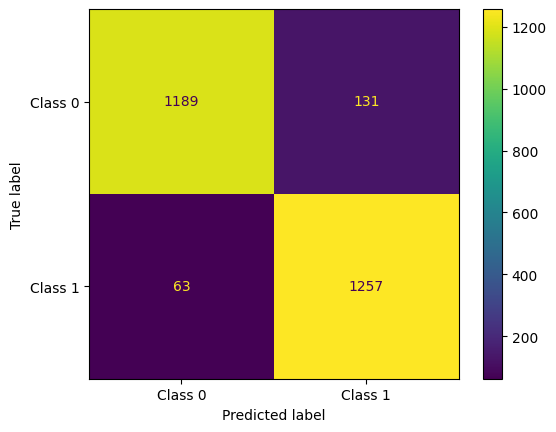

In [ ]:
# Confusion matrix for training data

confusion_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)
print("Confusion Matrix (Train):\n", confusion_matrix_train_rf)

# Confusion matrix for test data

confusion_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)
print("\nConfusion Matrix (Test):\n", confusion_matrix_test_rf)

# Calculate confusion matrix for test data

confusion_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)

# Display the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test_rf, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='viridis')
plt.show()

Random Forest Model Evaluation Results:

Recall Score:

On the training data, this model achieved a recall score of 0.9996, which is almost perfect. This shows that almost all positive classes can be identified correctly by the model.
In the test data, the recall score is 0.9515, which means 95.15% of the positive classes were correctly identified by the model.
Confusion Matrix:

On training data: Of the 5279 actual observations with label 0, 5144 of them were correctly classified by the model (True Negative) while 135 were incorrectly classified as class 1 (False Positive). Of the 5279 actual observations with label 1, 5277 of them were correctly classified by the model (True Positive) while 2 were incorrectly classified as class 0 (False Negative).

On test data: Of the 1320 actual observations with label 0, 1193 of them were correctly classified by the model (True Negative) while 127 were incorrectly classified as class 1 (False Positive). Of the 1320 actual observations with label 1, 1256 were correctly classified by the model (True Positive) while 64 were incorrectly classified as class 0 (False Negative).

Classification Report (Test Data):

Class 0: Precision 0.95 and Recall 0.90. Of all the class 0 predictions made by the model, 95% were actually class 0. Meanwhile, of all the actual class 0 observations, the model succeeded in identifying 90% of them.

Class 1: Precision 0.91 and Recall 0.95. Of all class 1 predictions by the model, 91% were actually class 1. Meanwhile, of all actual class 1 observations, the model succeeded in identifying 95% of them.

The F1 score for both classes is 0.93, indicating a good balance between precision and recall.

The overall accuracy of the model on the test data is 0.93, which means 93% of the model predictions are correct, while 7% are incorrect.

Error:

The total error made by the model on the training data is 4 out of 5279 observations, which is 0.04% of the total training data.

The total error made by the model on the test data is 128 out of 2640 observations, which is 4.85% of the total test data.

Conclusion:

The Random Forest model I developed showed excellent performance with an accuracy of 93% on test data. Although a very high recall score on the training data may indicate potential overfitting, the consistently high performance on the testing data indicates that the model has a good capacity to generalize and is effective in classifying unknown data.

AUC Score for Precision-Recall Curve: 0.9761024607946653


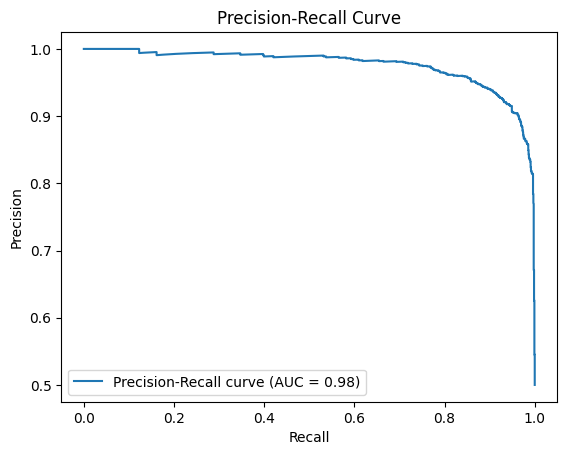

In [ ]:
# Calculating the positive predicted probability for class 1 (Bankrupt)
y_test_prob = best_rf_pipeline.predict_proba(X_test)[:, 1]

# Calculate Precision and Recall
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)

# Calculate AUC for Precision-Recall curve
pr_auc = auc(recall, precision)
print(f"AUC Score for Precision-Recall Curve: {pr_auc}")

# Optional: Plotting the Precision-Recall Curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

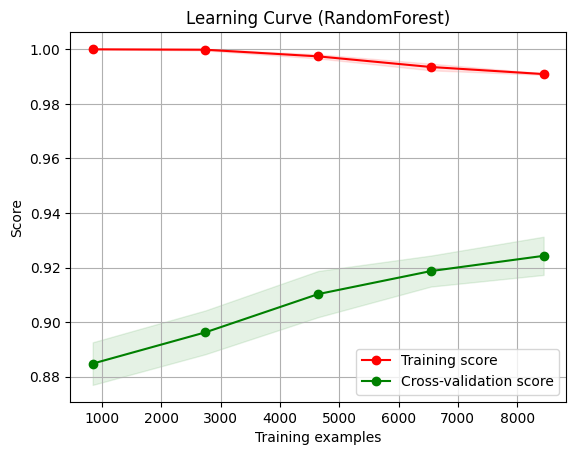

In [ ]:
# Create a function to plot Learning Curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                         n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
     plt.figure()
     plt.title(title)
     if ylim is not None:
         plt.ylim(*ylim)
     plt.xlabel("Training examples")
     plt.ylabel("Score")
     train_sizes, train_scores, test_scores = learning_curve(
         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
     train_scores_mean = np.mean(train_scores, axis=1)
     train_scores_std = np.std(train_scores, axis=1)
     test_scores_mean = np.mean(test_scores, axis=1)
     test_scores_std = np.std(test_scores, axis=1)
     plt.grid()

     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
     plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
     plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")

     plt.legend(loc="best")
     return plt

# Plot Learning Curve
title="Learning Curve (RandomForest)"
plot_learning_curve(best_rf_pipeline, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()